# E-commerce Performance Analysis

### Objective:

The objective of this project is to analyze the sales data of a company, focusing on understanding sales patterns based on categories, products, brands, and responsible supervisors, with the aim of generating a predictive study for future sales.

### Technologies used:

- Python: For data analysis, modeling, and visualization.
- SQL: For data manipulation in the database.
- Scikit-learn: For predictive modeling (linear regression).
- Matplotlib/Seaborn: For data visualization.

### About the data

| column | Spacification | Type |
|:---:|:---:|:---:|
| Order_Number | Order number | Float |
| State_Code | State code qhere ther purchase was made | Object |
| Customer_Name | Customer name | Object |
| Order_Date | Order date | Datetime |
| Status | Order status (e.g., processed, shipped, delivered, etc) | Object |
| Product | Product name | Object |
| Category | Product category | Object |
| Brand | Product brand | Object |
| Cost | Unit cost of the product | Float |
| Sales | Unit sales price of the product | Float |
| Quantity | Quantity of the product purchased | Float |
| Total_Cost | Total cost of the order (Cost * Quantity) | Float |
| Total_Sales | Total sales value (Sales * Quantity) | Float |
| Assigned Supervisor | Supervisor responsible for the sale | Object |

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading e-commerce data.
ecommerce = pd.read_csv('Ecommerce.csv')
ecommerce.head()

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan


In [21]:
# Converting Order_Date to datetime.
ecommerce['Order_Date'] = pd.to_datetime(ecommerce['Order_Date'], format='%d/%m/%Y')

In [23]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Number         5095 non-null   float64       
 1   State_Code           5095 non-null   object        
 2   Customer_Name        5095 non-null   object        
 3   Order_Date           5095 non-null   datetime64[ns]
 4   Status               5095 non-null   object        
 5   Product              5095 non-null   object        
 6   Category             5095 non-null   object        
 7   Brand                5095 non-null   object        
 8   Cost                 5095 non-null   float64       
 9   Sales                5095 non-null   float64       
 10  Quantity             5095 non-null   float64       
 11  Total_Cost           5095 non-null   float64       
 12  Total_Sales          5095 non-null   float64       
 13  Assigned Supervisor  5095 non-nul

In [25]:
ecommerce.isnull().sum()

Order_Number           15
State_Code             15
Customer_Name          15
Order_Date             15
Status                 15
Product                15
Category               15
Brand                  15
Cost                   15
Sales                  15
Quantity               15
Total_Cost             15
Total_Sales            15
Assigned Supervisor    15
dtype: int64

In [27]:
# Dropping null data.
ecommerce = ecommerce.dropna()

In [367]:
ecommerce.nunique()

Order_Number           5095
State_Code               35
Customer_Name            56
Order_Date             1086
Status                    4
Product                1228
Category                 14
Brand                    11
Cost                     26
Sales                    26
Quantity                  4
Total_Cost               98
Total_Sales              98
Assigned Supervisor       6
dtype: int64

In [369]:
ecommerce.describe().T

,count,mean,min,25%,50%,75%,max,std
Order_Number,5095.0,141921.0,139374.0,140647.5,141921.0,143194.5,144468.0,1470.944141
Order_Date,5095,2021-06-08 20:48:22.610402304,2020-01-11 00:00:00,2020-08-28 12:00:00,2021-04-27 00:00:00,2022-03-30 00:00:00,2022-12-31 00:00:00,NaN
Cost,5095.0,6066.123651,350.0,2100.0,6550.0,8500.0,14500.0,3952.022039
Sales,5095.0,7885.960746,455.0,2730.0,8515.0,11050.0,18850.0,5137.628651
Quantity,5095.0,2.486948,1.0,2.0,2.0,3.0,4.0,1.113581
Total_Cost,5095.0,14991.778214,350.0,4500.0,10720.0,22950.0,58000.0,12574.918427
Total_Sales,5095.0,19489.311678,455.0,5850.0,13936.0,29835.0,75400.0,16347.393955


# Data Exploration:

The study below will visually present an exploratory data analysis of an e-commerce dataset, aiming to identify patterns that may indicate its performance, so we can find ways to improve its development.

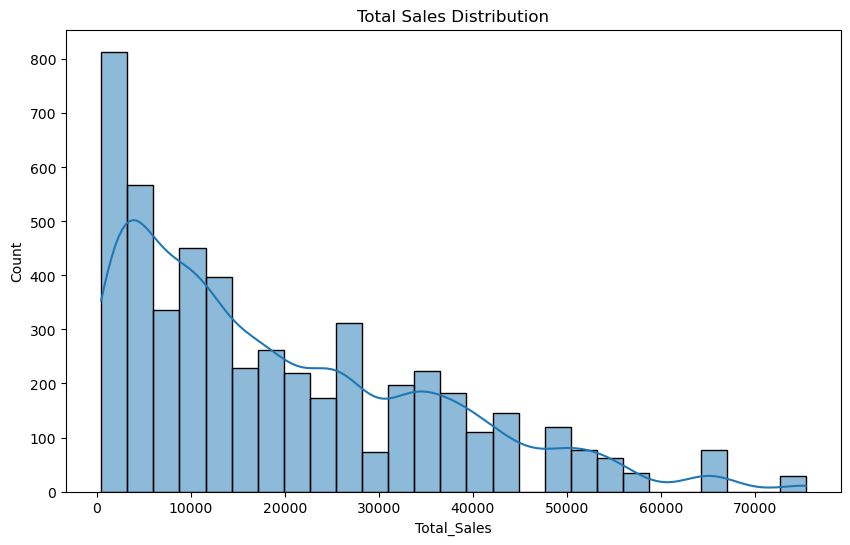

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(ecommerce['Total_Sales'], kde=True)
plt.title('Total Sales Distribution')
plt.show()

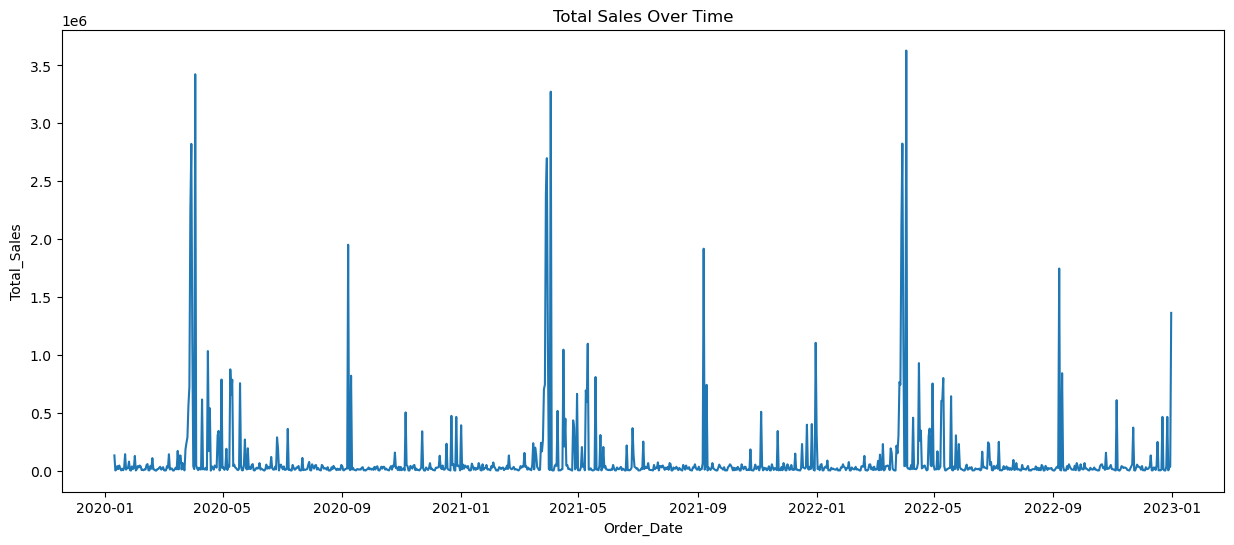

In [34]:
grouped_date = ecommerce.groupby('Order_Date').agg({'Total_Sales': 'sum'}).reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=grouped_date, x='Order_Date', y='Total_Sales')
plt.title('Total Sales Over Time')
plt.show()

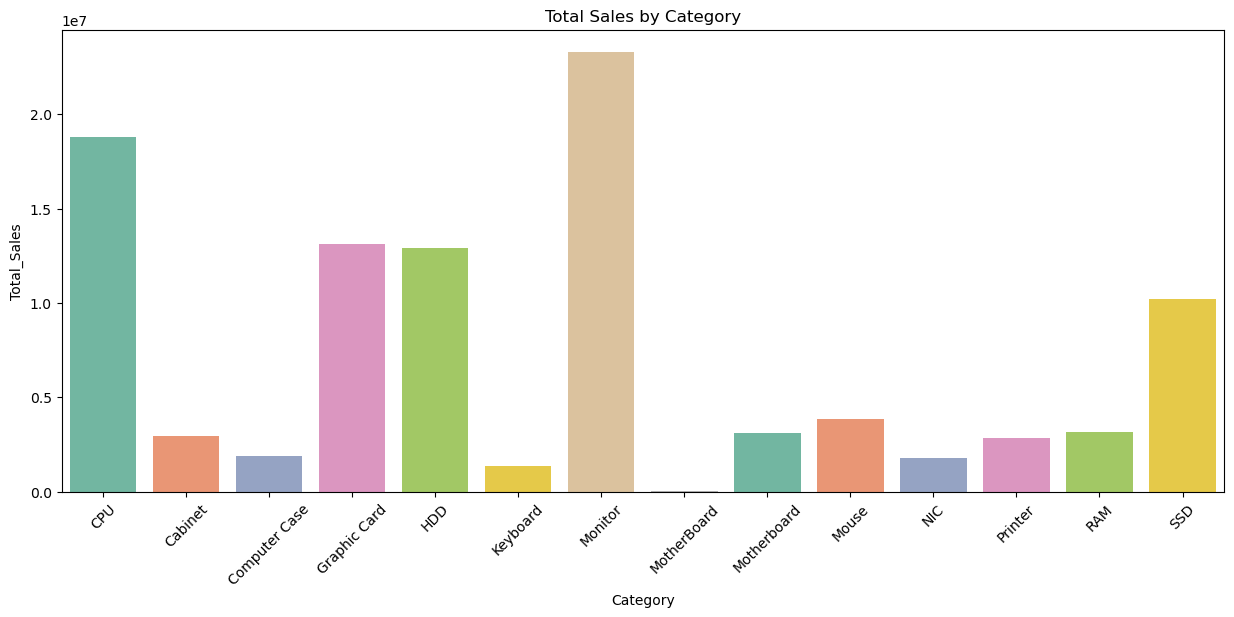

In [36]:
grouped_category = ecommerce.groupby('Category').agg({'Total_Sales': 'sum'}).reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=grouped_category, x='Category', y='Total_Sales', palette='Set2')
plt.xticks(rotation=45)
plt.title('Total Sales by Category')
plt.show()

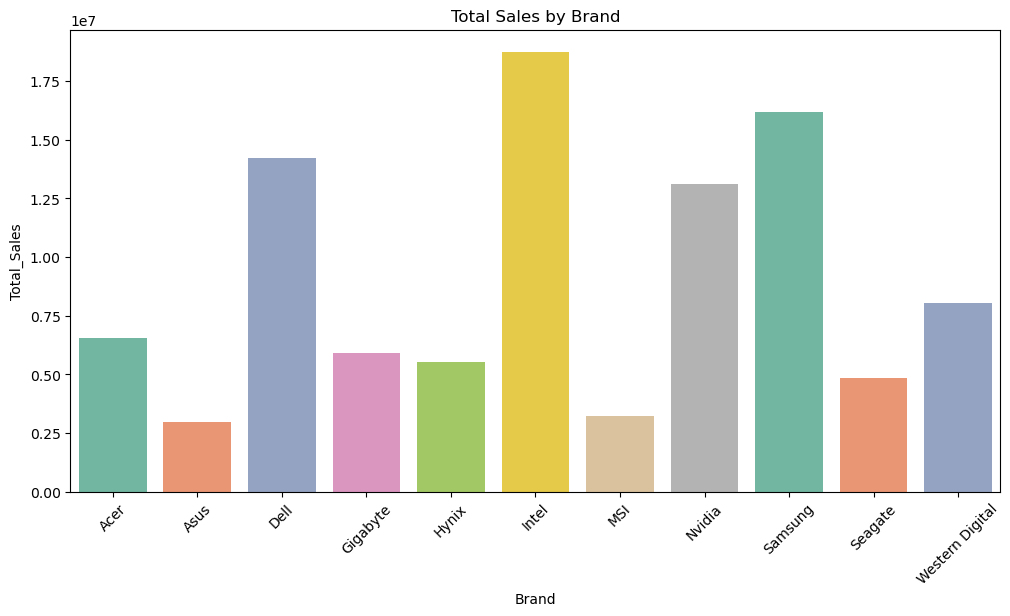

In [38]:
grouped_brand = ecommerce.groupby('Brand').agg({'Total_Sales': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(grouped_brand, y='Total_Sales', x='Brand', palette='Set2')
plt.xticks(rotation=45)
plt.title('Total Sales by Brand')
plt.show()

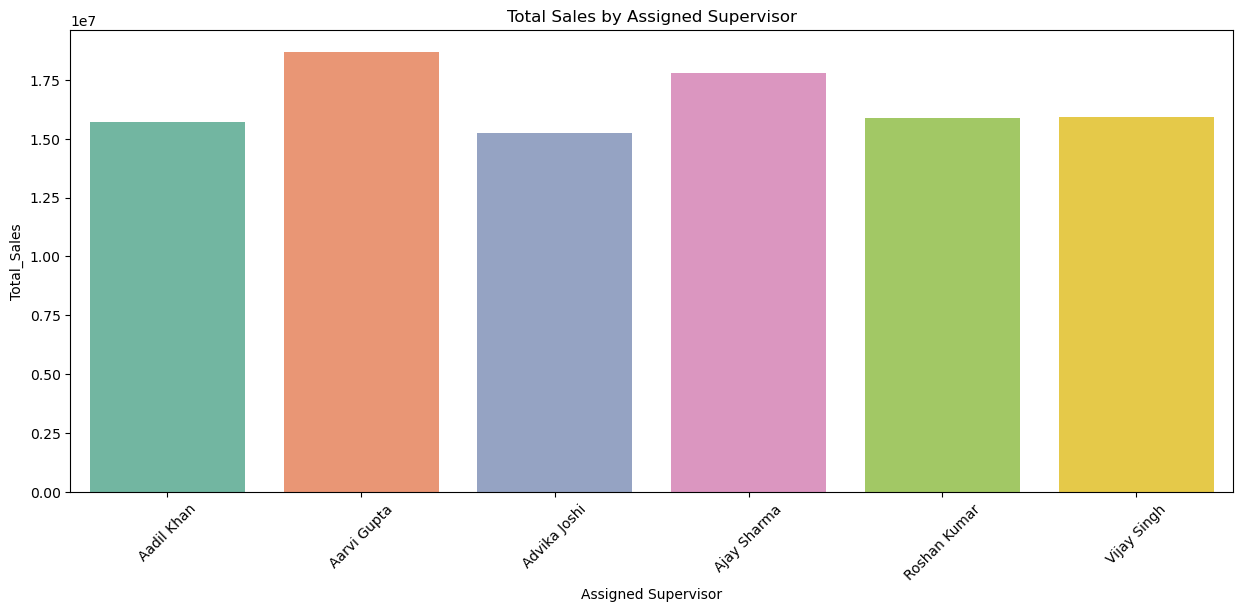

In [40]:
grouped_supervisor = ecommerce.groupby('Assigned Supervisor').agg({'Total_Sales': 'sum'}).reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(grouped_supervisor, y='Total_Sales', x='Assigned Supervisor', palette='Set2')
plt.xticks(rotation=45)
plt.title('Total Sales by Assigned Supervisor')
plt.show()

# Profitability Analysis

In [44]:
ecommerce['profit'] = ecommerce['Total_Sales'] - ecommerce['Total_Cost']

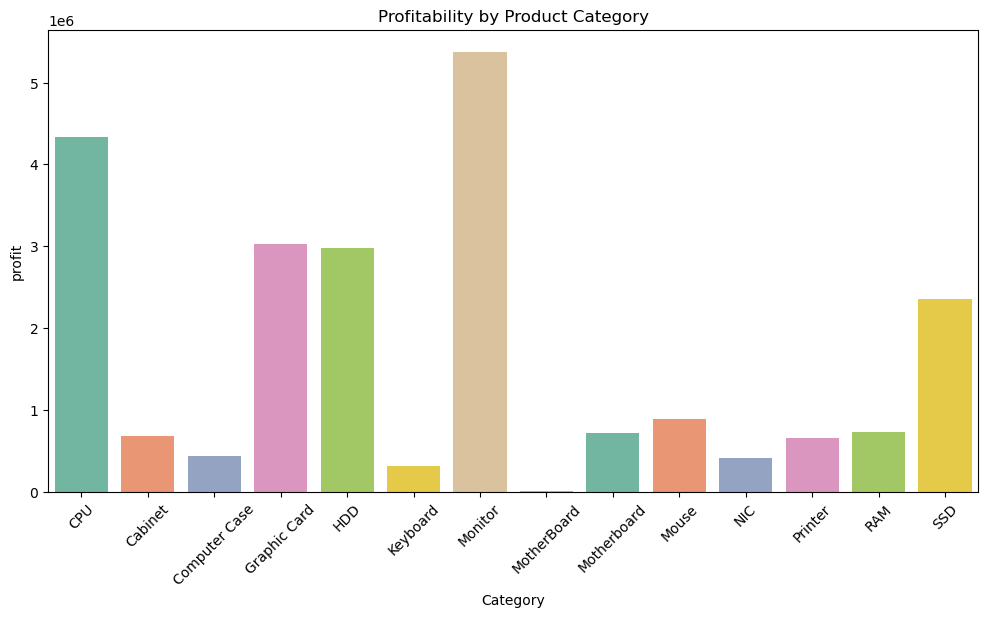

In [46]:
grouped_categoria_profit = ecommerce.groupby('Category').agg({'profit': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(grouped_categoria_profit, x='Category', y='profit', palette='Set2')
plt.title('Profitability by Product Category')
plt.xticks(rotation=45)
plt.show()

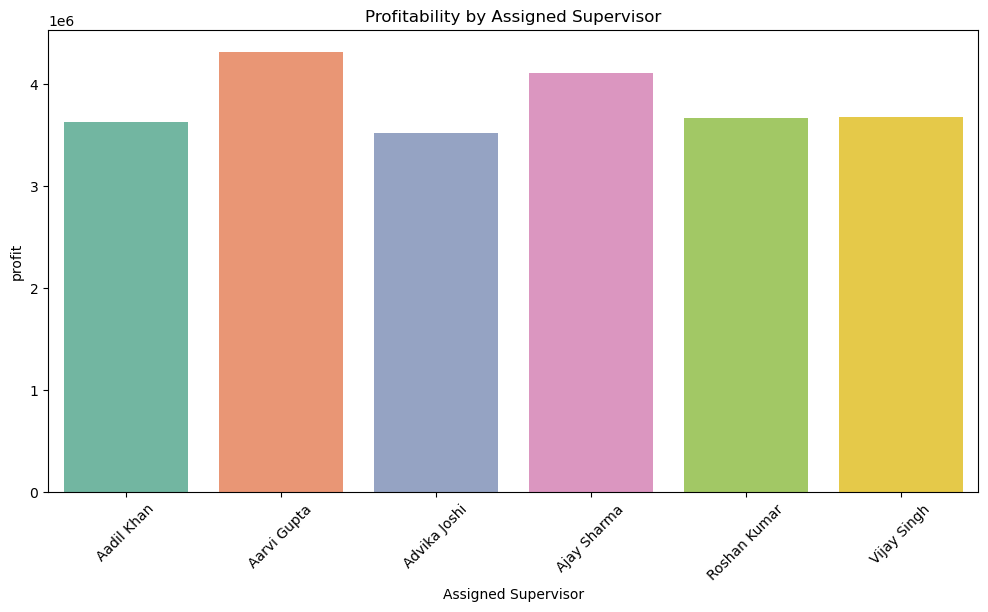

In [49]:
group_supervisor_profit = ecommerce.groupby('Assigned Supervisor').agg({'profit': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(group_supervisor_profit, x='Assigned Supervisor', y='profit', palette='Set2')
plt.title('Profitability by Assigned Supervisor')
plt.xticks(rotation=45)
plt.show()

# Predictive Model:

The model below aims to predict the Total_Sales for the upcoming years, allowing the company to develop a strategy for enhancing future sales.

In [52]:
X = ecommerce[['Cost', 'Quantity', 'Category', 'Brand']]
X = pd.get_dummies(X, drop_first=True)
y = ecommerce.Total_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([ 13006.30883822,  15534.40463956, -10237.04507898, ...,
        13902.5979511 ,  17593.60405297,  -3544.29832896])

In [64]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 4530.376307513111
RMSE: 5875.4928271527915
R²: 0.8776884339703344


### Marketing Recommendations and Pricing Strategy:

- The categories generating the highest margins are Monitors and CPUs. These should receive more attention for marketing investments.
- Adjust the pricing of products with lower margins but high sales volume (such as Graphics Cards, HDDs, and SSDs).

### Supervisor Recommendations:

- I recommend giving more attention to supervisors Aarvi Gupta and Ajay Aharma for better developing their teams and standing out in sales.

### Stock and Logistics Optimization:

- I recommend evaluating the inventory of products sold by category and creating a strategy for stock optimization.